# Overview of Scipy.stats library

This section will have the aim to provide a quick introduction to scipy.stats library and some of its functions. Scipy is a library specially suited for engineering maths and physics. It has several algorithms to perform complex functions more linked to an in-depth knowledge of this subjects.

In this notebook, there is a special look in some modules within scipy

## Signal Processing

This module contains some interesting filtering functions, design tools, and B-spline interpolation algorithms.


### B-splines

In [1]:
import numpy as np
from scipy import signal, misc
import matplotlib.pyplot as plt

In [2]:
image = misc.face(gray=True).astype(np.float32)

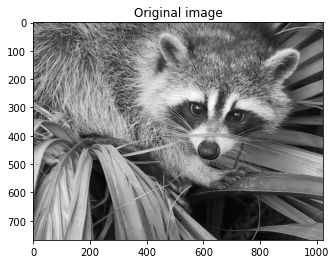

In [3]:
plt.figure()
plt.imshow(image)
plt.gray()
plt.title('Original image')
plt.show()

In [4]:
image = misc.face(gray=True).astype(np.float32)
derfilt = np.array([1.0, -2, 1.0], dtype=np.float32)
ck = signal.cspline2d(image, 8.0)
deriv = (signal.sepfir2d(ck, derfilt, [1]) + signal.sepfir2d(ck, [1], derfilt))

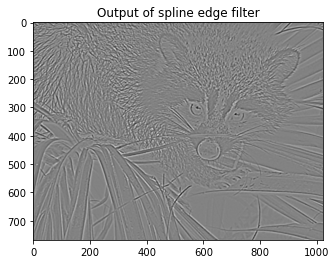

In [5]:
plt.figure()
plt.imshow(deriv)
plt.gray()
plt.title('Output of spline edge filter')
plt.show()

In [6]:
laplacian = np.array([[0,1,0], [1,-4,1], [0,1,0]], dtype=np.float32)
deriv2 = signal.convolve2d(ck,laplacian,mode='same',boundary='symm')


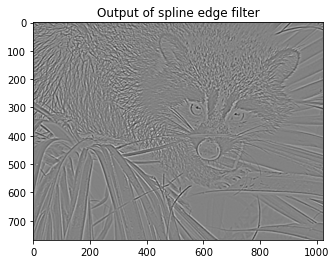

In [7]:
plt.figure()
plt.imshow(deriv2)
plt.gray()
plt.title('Output of spline edge filter')
plt.show()

In [9]:
deriv.shape

(768, 1024)

In [13]:
deriv2.shape

(768, 1024)

By comapring both images and shapes, we can see they look pretty similar.

### Statistics

In [13]:
from scipy import stats
from scipy.stats import norm

print("Cumulative Distribution function for 0 is %s",norm.cdf(0))
print("Survival function for 0 is %s",norm.sf(0))
print("Percent point function for 0 is %s",norm.ppf(0))
print("Sequences of 5 random values %s",norm.rvs(size=5))

Cumulative Distribution function for 0 is %s 0.5
Survival function for 0 is %s 0.5
Percent point function for 0 is %s -inf
Sequences of 5 random values %s [-0.39665374  0.45380895  0.12687909 -0.86837296 -0.31484397]


In [16]:
norm.stats(loc=3, scale=4, moments="mv")

(array(3.), array(16.))

In [17]:
norm.stats(loc=2, scale=5, moments="mv")

(array(2.), array(25.))